# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [8]:
#import numpy and pandas

import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats import mode
%matplotlib inline
import matplotlib.pyplot as plt

# Challenge 1 - The `stats` Submodule

This submodule contains statistical functions for conducting hypothesis tests, producing various distributions and other useful tools. Let's examine this submodule using the KickStarter dataset. We will load the dataset below.

In [2]:
# Run this code:
kickstarter = pd.read_csv('../ks-projects-201801.csv')

Now print the `head` function to examine the dataset.

In [3]:
# Your code here:
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Import the `mode` function from `scipy.stats` and find the mode of the `country` and `currency` column.

In [12]:
# Your code here:
kick_curr = kickstarter.currency.mode()
kick_curr


0    USD
dtype: object

In [13]:
kick_country = kickstarter.country.mode()
kick_country

0    US
dtype: object

The trimmed mean is a function that computes the mean of the data with observations removed. The most common way to compute a trimmed mean is by specifying a percentage and then removing elements from both ends. However, we can also specify a threshold on both ends. The goal of this function is to create a more robust method of computing the mean that is less influenced by outliers. SciPy contains a function called `tmean` for computing the trimmed mean. 

In the cell below, import the `tmean` function and then find the 75th percentile of the `goal` column. Compute the trimmed mean between 0 and the 75th percentile of the column. Read more about the `tmean` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tmean.html#scipy.stats.tmean).

In [41]:
# Your code here:

goal = kickstarter.goal
#goal_75 = np.percentile(goal, 75)
#goal_75
goal_75 = goal.quantile(0.75)
goal_75
goal_min = goal.min()
goal_min

0.01

In [43]:
stats.tmean(goal,(goal_min, goal_75))

4874.150287106898

#### SciPy contains various statistical tests. One of the tests is Fisher's exact test. This test is used for contingency tables. 

The test originates from the "Lady Tasting Tea" experiment. In 1935, Fisher published the results of the experiment in his book. The experiment was based on a claim by Muriel Bristol that she can taste whether tea or milk was first poured into the cup. Fisher devised this test to disprove her claim. The null hypothesis is that the treatments do not affect outcomes, while the alternative hypothesis is that the treatment does affect outcome. To read more about Fisher's exact test, click [here](https://en.wikipedia.org/wiki/Fisher%27s_exact_test).

Let's perform Fisher's exact test on our KickStarter data. We intend to test the hypothesis that the choice of currency has an impact on meeting the pledge goal. We'll start by creating two derived columns in our dataframe. The first will contain 1 if the amount of money in `usd_pledged_real` is greater than the amount of money in `usd_goal_real`. We can compute this by using the `np.where` function. If the amount in one column is greater than the other, enter a value of 1, otherwise enter a value of zero. Add this column to the dataframe and name it `goal_met`.

In [57]:
# Your code here:

kickstarter.head()

kickstarter['goal_met'] = np.where(kickstarter.usd_pledged_real > kickstarter.usd_goal_real, 1, 0)


,ID,My 2nd new column,goal_met,Fisher test,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,1,0,1,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,1,0,1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,1,0,1,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,1,0,1,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,1,0,1,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,1,1,1,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,1,1,1,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,1,0,1,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,1,0,1,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,1,0,1,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


Next, create a column that checks whether the currency of the project is in US Dollars. Create a column called `usd` using the `np.where` function where if the currency is US Dollars, assign a value of 1 to the row and 0 otherwise.

In [59]:
# Your code here:
kickstarter['usd'] = np.where(kickstarter.currency == 'USD', 1, 0)
kickstarter.head()

,ID,My 2nd new column,goal_met,Fisher test,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,usd
0,1000002330,1,0,1,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0
1,1000003930,1,0,1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,1
2,1000004038,1,0,1,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,1
3,1000007540,1,0,1,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,1
4,1000011046,1,0,1,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,1


Now create a contingency table using the `pd.crosstab` function in the cell below to compare the `goal_met` and `usd` columns.

In [62]:
usd = kickstarter['usd']
goal_met = kickstarter['goal_met']
pd.crosstab(usd, goal_met)

goal_met,0,1
usd,,
0,58685,24611
1,187130,108235


Import the `fisher_exact` function from `scipy.stats` and conduct the hypothesis test on the contingency table that you have generated above. You can read more about the `fisher_exact` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html#scipy.stats.fisher_exact). The output of the function should be the odds ratio and the p-value. The p-value will provide you with the outcome of the test.

In [64]:
# Your code here:
oddsratio, pvalue = stats.fisher_exact([[58685,24611], [187130, 108235]])
oddsratio, pvalue
#the p value, the probability is null for the null hypothesis so there is a correlation between the met goal and the currency in dollars.

(1.3791838163150314, 9.78e-321)

# Challenge 2 - The `linalg` submodule

This submodule allows us to perform various linear algebra calculations. 

Using the solve function, find the solution of the equation system 5x + 2y = 3 and 3x + y = 2 in the cell below.

In [67]:
# Your code here:
from scipy.linalg import solve

#5x + 2y = 3 and 3x + y = 2
a = np.array([[5, 2], [3, 1]])
b = np.array([3, 2])
result = solve(a, b)
result

array([ 1., -1.])

# Challenge 3 - The `interpolate` submodule

This submodule allows us to interpolate between two points and create a continuous distribution based on the observed data.

In the cell below, import the `interp1d` function and first take a sample of 10 rows from `kickstarter`. 

In [130]:
# Your code here:
from scipy.interpolate import interp1d
sample = kickstarter.sample(n=30)
sample

,ID,My 2nd new column,goal_met,Fisher test,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,usd
2596,1013369499,1,0,1,Don't go to Sleep: a story based on sleep para...,Horror,Film & Video,USD,2014-09-17,15000.0,2014-08-18 22:12:10,0.00,failed,0,US,0.00,0.00,15000.00,1
19033,1096480689,1,1,1,Upshot - Short Film,Comedy,Film & Video,GBP,2016-05-06,300.0,2016-04-05 22:00:12,331.00,successful,16,GB,471.16,479.69,434.76,0
373369,972547626,1,0,1,Ukule-me,Music,Music,AUD,2014-09-11,250.0,2014-08-12 23:35:22,0.00,failed,0,AU,0.00,0.00,226.33,0
114341,1580740086,1,0,1,reviveTYRES,Footwear,Fashion,EUR,2015-07-18,15400.0,2015-06-18 20:15:22,11.00,failed,1,ES,12.38,12.03,16846.07,0
144586,1734572592,1,1,1,Sterling Pickle Woodworking,Woodworking,Crafts,USD,2015-06-05,14000.0,2015-05-06 19:05:03,15151.00,successful,59,US,15151.00,15151.00,14000.00,1
97074,1493121550,1,0,1,Nina's Bakery by Kim,Events,Food,USD,2014-08-21,3000.0,2014-07-22 01:09:13,11.00,failed,2,US,11.00,11.00,3000.00,1
92922,1472491011,1,0,1,Braving The Storm,Documentary,Film & Video,USD,2012-04-04,2500.0,2012-02-04 18:52:58,341.00,failed,15,US,341.00,341.00,2500.00,1
302106,608419679,1,0,1,"Custom World RISK board (Westeros, Hyrule, and...",Tabletop Games,Games,EUR,2015-05-19,550.0,2015-04-29 21:24:49,95.00,failed,16,NL,103.33,106.06,614.02,0
101607,1516347123,1,0,1,SpectorDance and MBARI present Ocean at the Sm...,Dance,Dance,USD,2012-05-15,5000.0,2012-04-09 19:20:03,5000.00,successful,43,US,5000.00,5000.00,5000.00,1
249241,337736704,1,0,1,an hour with John Doe,Film & Video,Film & Video,USD,2016-02-06,1100.0,2016-01-07 19:09:43,0.00,undefined,0,"N,0""",NaN,0.00,1100.00,1


Next, create a linear interpolation of the backers as a function of `usd_pledged_real`. Create a function `f` that generates a linear interpolation of backers as predicted by the amount of real pledged dollars.

Now create a new variable called x_new. This variable will contain all integers between the minimum number of backers in our sample and the maximum number of backers. The goal here is to take the dataset that contains few obeservations due to sampling and fill all observations with a value using the interpolation function.
Hint: one option is the np.arange function.

In [131]:
# Your code here:
x = sample['usd_pledged_real']

y = sample['backers']
f = interp1d(x, y)



In [132]:
# Your code here:
backers_min = sample['backers'].min()
backers_min
backers_max = sample['backers'].max()
backers_max

937

In [133]:
x_new = np.arange(backers_min, backers_max)


Plot function f for all values of `x_new`. Run the code below.

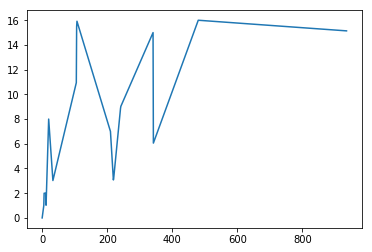

In [134]:
# Run this code:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_new, f(x_new))

Next create a function that will generate a cubic interpolation function. Name the function `g`

In [138]:
# Your code here:
x2 = x
y2 = np.sin(y)
g = interp1d(x2, y2)

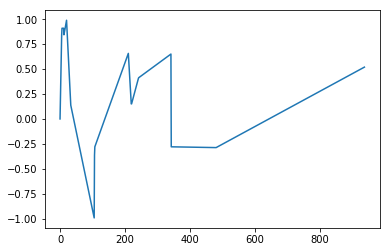

In [139]:
# Run this code:

plt.plot(x_new, g(x_new))

# Bonus Challenge - The Binomial Distribution

The binomial distribution allows us to calculate the probability of k successes in n trials for a random variable with two possible outcomes (which we typically label success and failure).  

The probability of success is typically denoted by p and the probability of failure is denoted by 1-p.

The `scipy.stats` submodule contains a `binom` function for computing the probabilites of a random variable with the binomial distribution. You may read more about the binomial distribution [here](https://en.wikipedia.org/wiki/Binomial_distribution) and about the `binom` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom).

In the cell below, compute the probability that a die lands on 5 exactly 3 times in 8 tries.

Hint: the probability of rolling a 5 is 1/6.

In [19]:
# Your code here:

